# Atividade

## Carregando os dados

In [1]:
import requests
import pandas as pd


url = "https://dados-mba-python-2023.s3.amazonaws.com/carro_atividade1.csv"
r = requests.get(url, stream=True)


In [2]:

df_carros = pd.read_csv(url,sep=',',names=['preço_compra','preço_manutenção','portas','pessoas','porta-malas','segurança','classe'])

## 1. Mostre o DataFrame::

In [3]:
# Escreva seu código aqui
dfc = pd.DataFrame(df_carros)
dfc.head()

,preço_compra,preço_manutenção,portas,pessoas,porta-malas,segurança,classe
0,m_alta,med,2,4,pequeno,alta,aceito
1,m_alta,med,2,4,med,alta,aceito
2,m_alta,med,2,4,grande,med,aceito
3,m_alta,med,2,4,grande,alta,aceito
4,m_alta,med,2,more,med,alta,aceito


## 2. Quais tipos de dados nós temos?

In [4]:
# Escreva seu código aqui
dfc.dtypes

preço_compra        object
preço_manutenção    object
portas               int64
pessoas             object
porta-malas         object
segurança           object
classe              object
dtype: object

## 3. Do ponto de vista estatístico, como se comporta o atributo 'portas' (maior valor, menor valor etc.)?  

In [5]:
# Escreva seu código aqui
dfc['portas'].describe()

count    1728.000000
mean        3.567130
std         1.257799
min         2.000000
25%         2.750000
50%         3.500000
75%         4.250000
max         7.000000
Name: portas, dtype: float64

## 4. Quantos valores diferentes encontramos no atributo ‘porta_malas’?

In [6]:
# Escreva seu código aqui
dfc['porta-malas'].value_counts()

porta-malas
pequeno    576
med        576
grande     576
Name: count, dtype: int64

Considerando que para treinarmos uma rede neural (criarmos um modelo) para prever se um dado modelo de veículo terá uma boa aceitação no mercado, os dados devem estar rotulados como: 'aceito' e 'n_aceito'. 

## 5. Os dados atuais atendem esse requisito?

In [7]:
# Escreva seu código aqui
dfc['classe'].value_counts()

classe
n_aceito    1210
aceito       384
bom           69
m_bom         65
Name: count, dtype: int64

Não, pois existem dados diferentes dos rótulos 'aceito e 'n_aceito', como: 'bom' e 'm_bom'

## 6. Existe alguma discrepância no atributo portas?

Dica: use um gráfico de caixa.

In [8]:
# Escreva seu código aqui
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
dfc['portas'].value_counts()

portas
2    432
3    432
4    432
5    374
7     58
Name: count, dtype: int64

<Axes: >

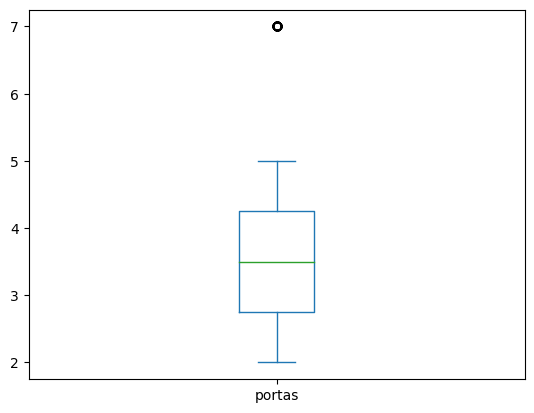

In [10]:
dfc['portas'].plot.box()

Existe uma possível descrepância, no caso dos carros com 7 portas. O que demanda análise para confirmar essa descrepância.

## 7. Analisando o alvo (target)

Que informações você consegue obter analisando o target?

In [11]:
# Escreva seu código aqui

In [12]:
dfcc = dfc
classe_cat = {'n_aceito':0,'aceito':1,'bom':2,'m_bom':3}
dfcc['classe']= dfc['classe'].replace(classe_cat)
dfcc.columns

Index(['preço_compra', 'preço_manutenção', 'portas', 'pessoas', 'porta-malas',
       'segurança', 'classe'],
      dtype='object')

<Axes: xlabel='classe', ylabel='preço_compra'>

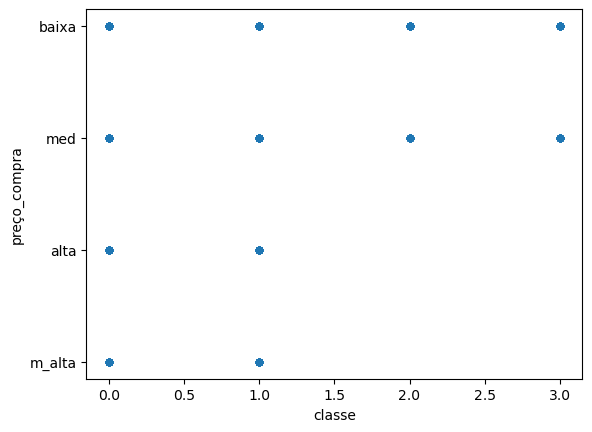

In [13]:
dfcc.plot.scatter(y='preço_compra',x='classe')

<Axes: xlabel='classe', ylabel='preço_manutenção'>

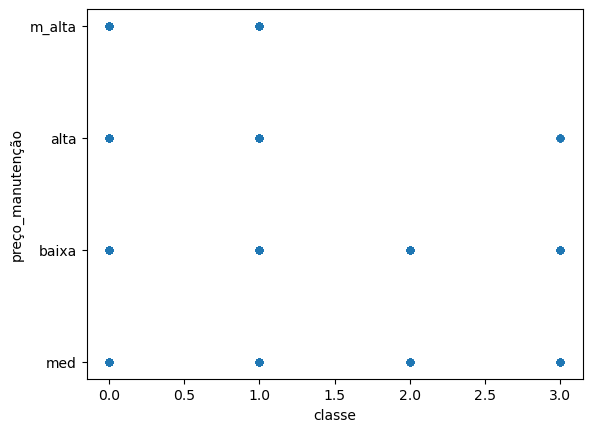

In [14]:
dfcc.plot.scatter(y='preço_manutenção',x='classe')

<Axes: xlabel='classe', ylabel='pessoas'>

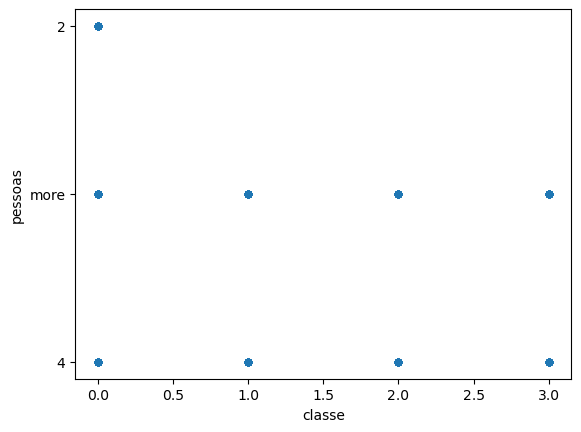

In [15]:
dfcc.plot.scatter(y='pessoas',x='classe')

<Axes: xlabel='classe', ylabel='porta-malas'>

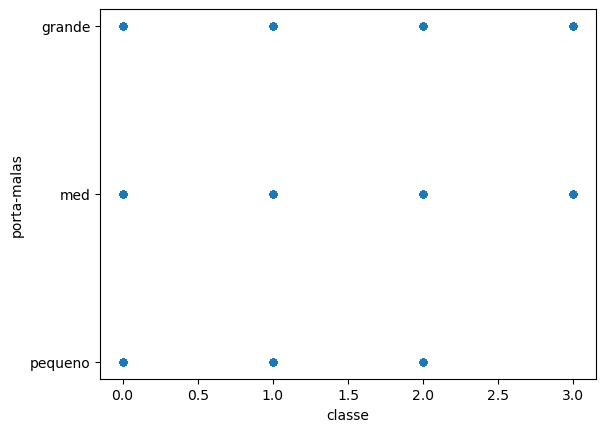

In [16]:
dfcc.plot.scatter(y='porta-malas',x='classe')

<Axes: xlabel='classe', ylabel='segurança'>

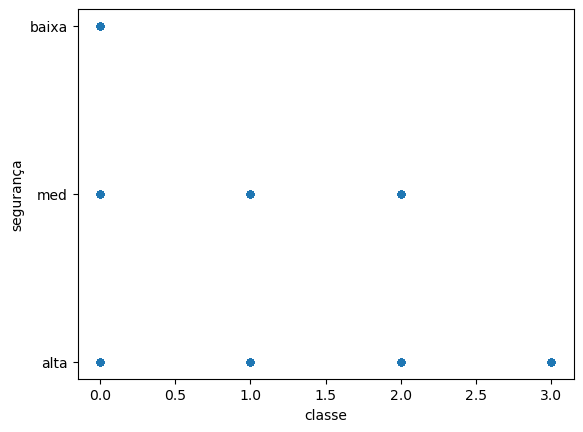

In [17]:
dfcc.plot.scatter(y='segurança',x='classe')